In [25]:
import pandas as pd
import urllib as ul

import seaborn as sns

# from Bio import Entrez

**Part Two [25 marks]**

 - 15 marks for successfully completing the tasks.
 - up to 6 marks for including one additional piece of analysis.
 - up to 4 marks for exceptionally well organised and executed approach.

Next we want to look at some of the functional terms that have been annotated to SFARI genes separating them out by their gene-score.

## Task 1

Map the gene-symbol for every gene in the SFARI gene list to an NCBI UID (unique Entrez Gene identifier) (2 marks). 

In [2]:
SFARI_gene = pd.read_csv('SFARI-Gene_genes_10-29-2020release_11-22-2020export.csv')

print(len(SFARI_gene))
SFARI_gene.head()

992


,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3


I used the Gene information of Homo Sapiens which was found here: 

https://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz 

to link the gene symbols to the gene IDs. 

In [3]:
# retrieve the Homo_sapiens file
# ul.request.urlretrieve('https://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz','Homo_sapiens.gene_info.gz')

Homo = pd.read_csv('Homo_sapiens.gene_info.gz', compression='gzip', header=0, sep='\t')

Homo.head()

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20201124,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20201124,-
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000256069,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20201124,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171428,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20201124,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156006,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20201124,-


In [4]:
Map = pd.merge(SFARI_gene, Homo, left_on = 'gene-symbol', right_on = 'Symbol')
Map = pd.DataFrame(Map, columns = ['GeneID', 'gene-symbol', 'gene-score'])

print(len(Map))
Map.head()

985


,GeneID,gene-symbol,gene-score
0,18,ABAT,3.0
1,10349,ABCA10,3.0
2,154664,ABCA13,3.0
3,10347,ABCA7,3.0
4,1636,ACE,3.0


## Task 2

Using the gene2go file from NCBI that we worked with in week 8 find the Gene Ontology terms that have been annotated to all of the SFARI genes (4marks).

In [5]:
# retrieve the gene2go file
# ul.request.urlretrieve('https://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz','gene2go.gz')

gene2go = pd.read_csv('gene2go.gz', compression='gzip', header=0, sep='\t')

gene2go.head()

,#tax_id,GeneID,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
0,3702,814629,GO:0005634,ISM,-,nucleus,-,Component
1,3702,814629,GO:0008150,ND,-,biological_process,-,Process
2,3702,814630,GO:0003700,ISS,-,DNA-binding transcription factor activity,11118137,Function
3,3702,814630,GO:0005634,ISM,-,nucleus,-,Component
4,3702,814630,GO:0006355,TAS,-,"regulation of transcription, DNA-templated",11118137,Process


In [6]:
GO_terms = pd.merge(Map, gene2go, on = 'GeneID')
# GO_terms = pd.DataFrame(GO_terms, columns = ['GeneID', 'gene-symbol', 'GO_term', 'gene-score']).drop_duplicates().groupby('GeneID')
GO_terms = pd.DataFrame(GO_terms, columns = ['GeneID', 'GO_ID', 'gene-symbol', 'GO_term', 'gene-score'])

print(len(GO_terms))
GO_terms.head()

26898


,GeneID,GO_ID,gene-symbol,GO_term,gene-score
0,18,GO:0001666,ABAT,response to hypoxia,3.0
1,18,GO:0003867,ABAT,4-aminobutyrate transaminase activity,3.0
2,18,GO:0005739,ABAT,mitochondrion,3.0
3,18,GO:0005739,ABAT,mitochondrion,3.0
4,18,GO:0005739,ABAT,mitochondrion,3.0


## Task 3

Now split the genes up into three lists by their SFARI gene-score (1 mark).

In [7]:
GO_terms_split = GO_terms.groupby('gene-score')

GO_terms_1 = GO_terms_split.get_group(1).drop_duplicates()
GO_terms_2 = GO_terms_split.get_group(2).drop_duplicates()
GO_terms_3 = GO_terms_split.get_group(3).drop_duplicates()

GO_terms_1.head()

,GeneID,GO_ID,gene-symbol,GO_term,gene-score
553,23394,GO:0000785,ADNP,chromatin,1.0
554,23394,GO:0000981,ADNP,"DNA-binding transcription factor activity, RNA...",1.0
555,23394,GO:0003677,ADNP,DNA binding,1.0
556,23394,GO:0005507,ADNP,copper ion binding,1.0
557,23394,GO:0005515,ADNP,protein binding,1.0


In [8]:
GO_terms_1.to_csv('GO_terms_1.csv')
GO_terms_2.to_csv('GO_terms_2.csv')
GO_terms_3.to_csv('GO_terms_3.csv')

## Task 4

Create tables of the 10 most commonly annotated terms for each gene list. The tables should have the following columns: GO term ID, GO term Description, GO term count (3 marks).

In [9]:
# gene-score: 1
GO_top10_1 = pd.merge(pd.DataFrame(GO_terms_1, columns = ['GO_ID', 'GO_term']), pd.DataFrame(GO_terms_1.value_counts('GO_term'), columns = ['GO_term_count']), on = 'GO_term').sort_values(by = 'GO_term_count', ascending = False).drop_duplicates()
# pd.DataFrame(GO_terms_1.value_counts('GO_term'), columns = ['GO_term_count']).iloc[1:11]

GO_top10_1.to_csv('GO_1.csv')
GO_top10_1.iloc[1:11]

,GO_ID,GO_term,GO_term_count
333,GO:0005634,nucleus,106
1167,GO:0005654,nucleoplasm,84
576,GO:0005829,cytosol,66
813,GO:0005886,plasma membrane,58
398,GO:0005737,cytoplasm,55
460,GO:0006357,regulation of transcription by RNA polymerase II,45
1530,GO:0046872,metal ion binding,42
1501,GO:0045944,positive regulation of transcription by RNA po...,38
1,GO:0000785,chromatin,38
74,GO:0003677,DNA binding,35


In [10]:
# gene-score: 2
GO_top10_2 = pd.merge(pd.DataFrame(GO_terms_2, columns = ['GO_ID', 'GO_term']), pd.DataFrame(GO_terms_2.value_counts('GO_term'), columns = ['GO_term_count']), on = 'GO_term').sort_values(by = 'GO_term_count', ascending = False).drop_duplicates()

GO_top10_2.to_csv('GO_2.csv')
GO_top10_2.iloc[1:11]

,GO_ID,GO_term,GO_term_count
296,GO:0005886,plasma membrane,76
239,GO:0005634,nucleus,71
553,GO:0005829,cytosol,68
754,GO:0005737,cytoplasm,61
998,GO:0005654,nucleoplasm,56
877,GO:0016021,integral component of membrane,33
404,GO:0016020,membrane,32
813,GO:0005887,integral component of plasma membrane,31
1058,GO:0070062,extracellular exosome,27
724,GO:0005524,ATP binding,25


In [11]:
# gene-score: 3
GO_top10_3 = pd.merge(pd.DataFrame(GO_terms_3, columns = ['GO_ID', 'GO_term']), pd.DataFrame(GO_terms_3.value_counts('GO_term'), columns = ['GO_term_count']), on = 'GO_term').sort_values(by = 'GO_term_count', ascending = False).drop_duplicates()

GO_top10_3.to_csv('GO_3.csv')
GO_top10_3.iloc[1:11]

,GO_ID,GO_term,GO_term_count
517,GO:0005886,plasma membrane,179
1974,GO:0005829,cytosol,141
1675,GO:0005634,nucleus,125
1872,GO:0005737,cytoplasm,120
2469,GO:0005654,nucleoplasm,102
417,GO:0016021,integral component of membrane,88
2237,GO:0005887,integral component of plasma membrane,82
256,GO:0046872,metal ion binding,67
2817,GO:0016020,membrane,67
1134,GO:0070062,extracellular exosome,59


## Task 5

Take the three lists of UIDs created above and use the PantherDB tool - http://pantherdb.org/ to perform a “Functional classification viewed in graphic charts” analysis reporting and select the “Bar chart” display option, using default settings. Once on the results page displaying the bar chart use the pull-down menu to change the ontology to “Biological Process”. Click the small (!) “export” button to download the results as a text file and us this to make your own bar chart (5 marks).

In [12]:
UID_list = Map.groupby('gene-score')

UID_list_1 = pd.DataFrame(UID_list.get_group(1), columns = ['GeneID'])
UID_list_1.to_csv('UID_list_1.csv')

UID_list_2 = pd.DataFrame(UID_list.get_group(2), columns = ['GeneID'])
UID_list_2.to_csv('UID_list_2.csv')

UID_list_2 = pd.DataFrame(UID_list.get_group(3), columns = ['GeneID'])
UID_list_2.to_csv('UID_list_3.csv')

In [72]:
data_1 = pd.DataFrame(pd.read_csv('BarChart1.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_1 = data_1.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_2 = pd.DataFrame(pd.read_csv('BarChart2.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_2 = data_2.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_3 = pd.DataFrame(pd.read_csv('BarChart3.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_3 = data_3.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_1.head()

,GO_name,genes,hit_against_total_genes,hit_against_total_Process_hits
0,developmental process (GO:0032502),21,9.5%,4.7%
1,multicellular organismal process (GO:0032501),23,10.4%,5.2%
2,cellular process (GO:0009987),99,44.6%,22.3%
3,reproduction (GO:0000003),2,0.9%,0.5%
4,cell population proliferation (GO:0008283),3,1.4%,0.7%


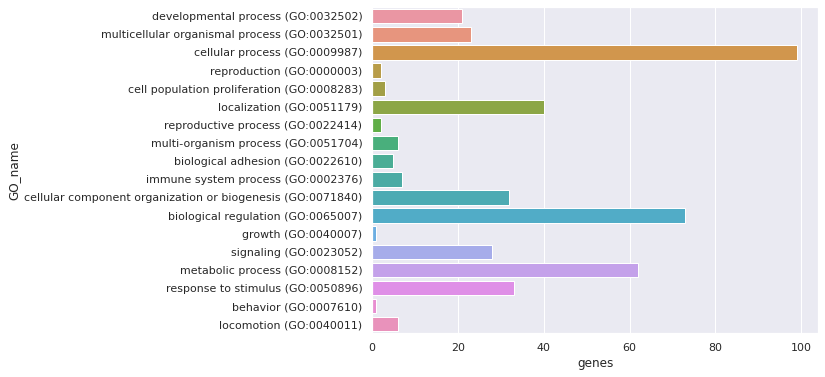

In [73]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(8, 6)})
sns.barplot(data = data_1, x = 'genes', y = 'GO_name', orient = 'h')

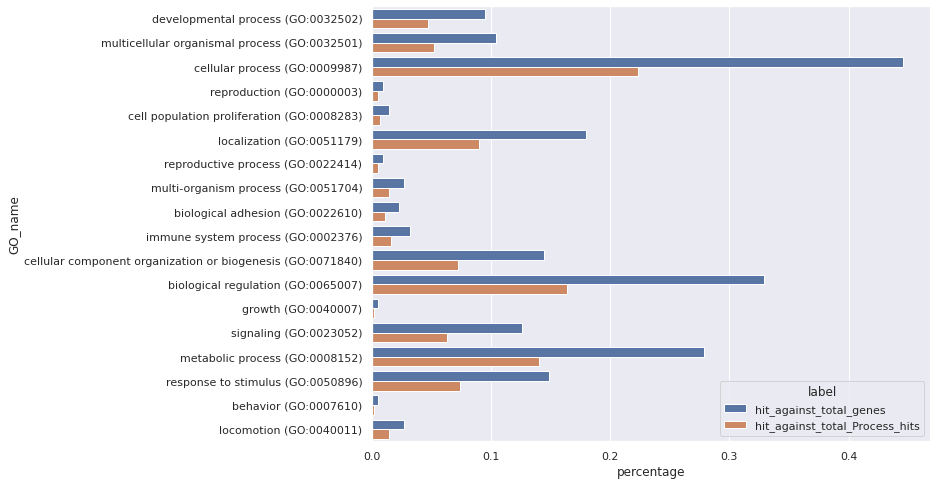

In [74]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(10, 8)})

data_1_percent = data_1.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_1_percent['percentage'] = data_1_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_1_percent, x = 'percentage', y = 'GO_name', hue = 'label')

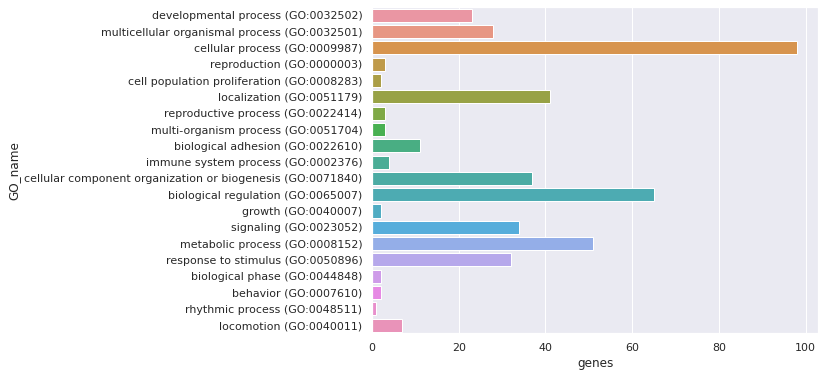

In [75]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(8, 6)})
sns.barplot(data = data_2, x = 'genes', y = 'GO_name', orient = 'h')

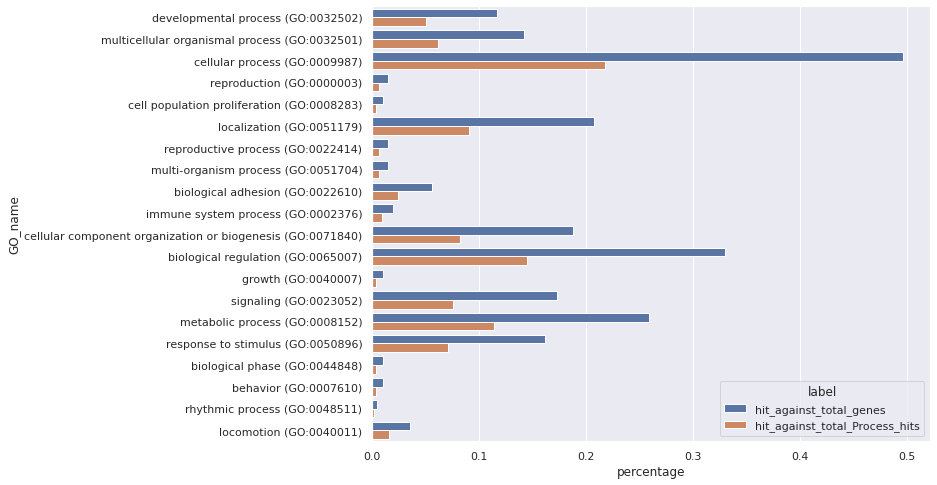

In [77]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(10, 8)})

data_2_percent = data_2.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_2_percent['percentage'] = data_2_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_2_percent, x = 'percentage', y = 'GO_name', hue = 'label')

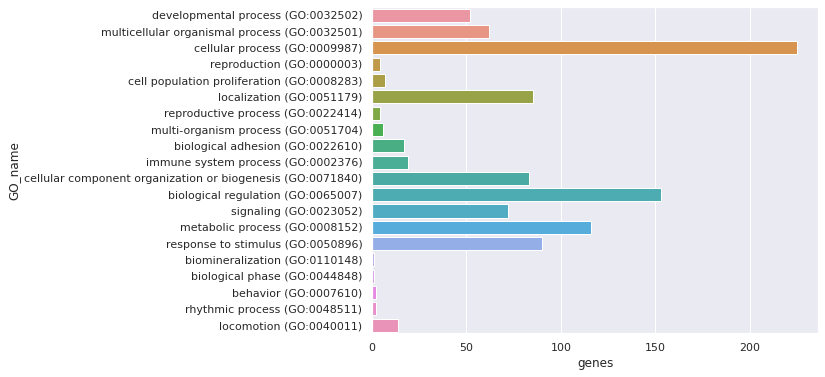

In [78]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(8, 6)})
sns.barplot(data = data_3, x = 'genes', y = 'GO_name', orient = 'h')

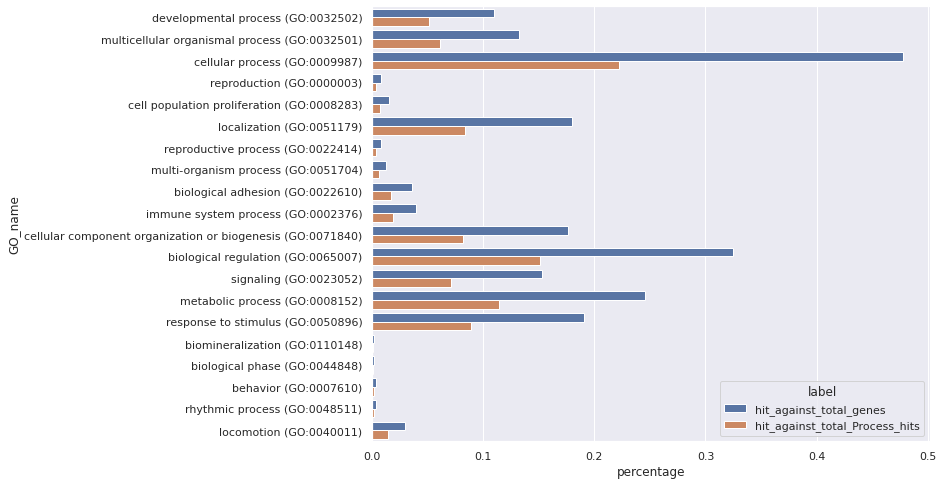

In [79]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(10, 8)})

data_3_percent = data_3.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_3_percent['percentage'] = data_3_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_3_percent, x = 'percentage', y = 'GO_name', hue = 'label')

From the discussion: 

The GO IDs/terms don't match the ones I've found in task 4: e.g. my task 4 terms are much more granular whereas the pantherDB terms are quite broad,

## Requirement

Compare and contrast your results from Tasks 4 and 5 and any differences you find between the gene lists from the different gene-score categories in the SFARI gene lists. What can you say about Autism genes based on the results from these analyses?

Possible extensions here might be to explore other pathway analysis tools and websites such as KEGG and Reactome. You could also chose to perform a statistical analysis directly on the results from Task 4.